https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv
# 자전거 대여량 예측 모델

datetime - 시간별 날짜 + 타임스탬프   
season - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울   
holiday - 해당 요일이 휴일인지 여부   
workingday - 해당 요일이 주말이나 휴일이 아닌지 여부    
weather - 1: 맑음, 구름 약간, 부분적으로 구름, 부분적으로 구름   
2: 안개 + 구름, 안개 + 깨진 구름, 안개 + 구름 약간, 안개   
3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름   
4: 폭우 + 얼음판 + 뇌우 + 안개, 눈 + 안개    
temp - 섭씨 온도   
atemp - 체감 온도   
섭씨 humid - 상대 습도   
windspeed - 풍속   
casual - 미등록된 사용자가 시작한 대여 수   
registered - 등록된 사용자가 시작한 대여 수   
count - 총 대여 수   

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [40]:
df = pd.read_csv("BikeSharingDemand/train.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [41]:
(df["datetime"].iloc[0][5:-3])

'01-01 00:00'

In [42]:
def remove_year_sceond(data):
    return data[5:-4]

In [43]:
df["datetime"] = df["datetime"].apply(remove_year_sceond)

In [44]:
le = LabelEncoder()

df["datetime"] = le.fit_transform(df["datetime"])
df


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,5467,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,5468,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,5469,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,5470,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  int64  
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1020.7 KB


In [46]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2745.164983,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1576.351771,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1385.250000,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2747.500000,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4109.750000,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,5471.000000,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [55]:
df.corr()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.968116,0.000400,-0.002550,0.011342,0.258590,0.264820,0.201630,-0.145989,0.094887,0.172099,0.169668
season,0.968116,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.000400,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.002550,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.011342,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258590,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264820,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.201630,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.145989,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.094887,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


datetime


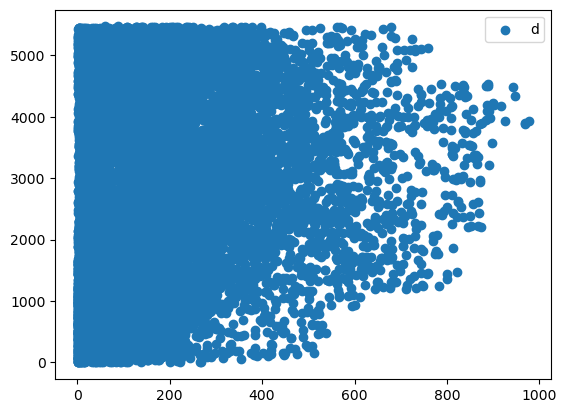

season


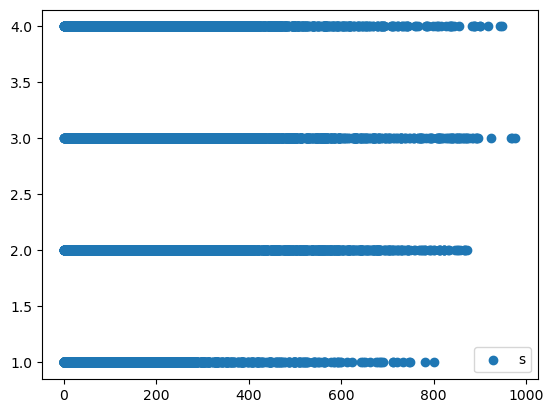

holiday


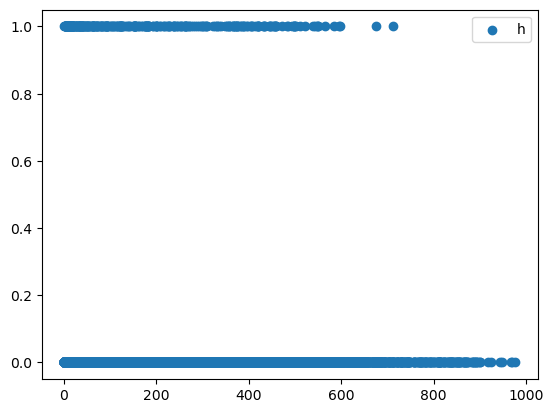

workingday


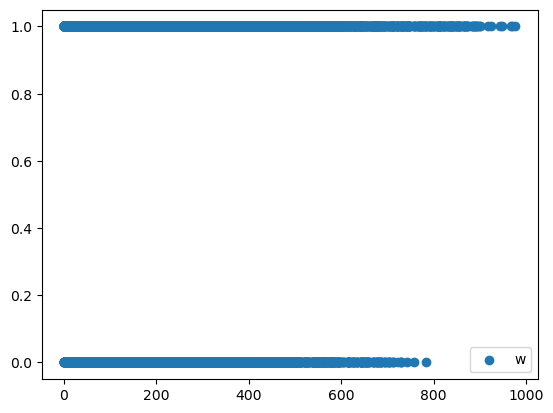

weather


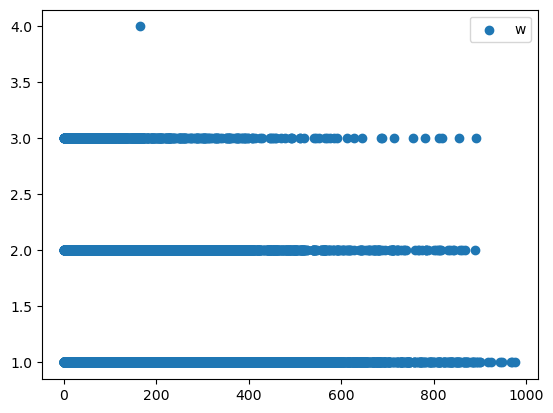

temp


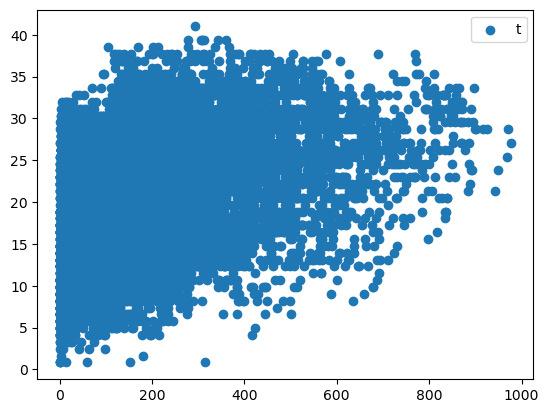

atemp


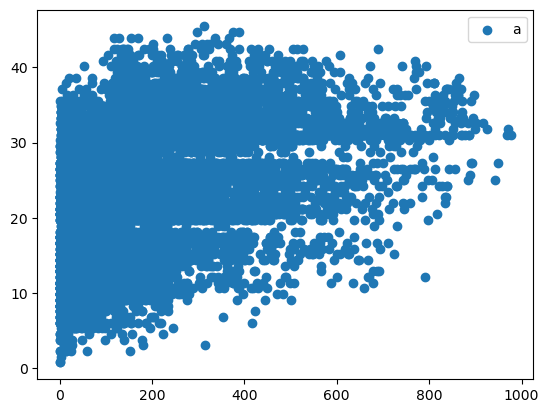

humidity


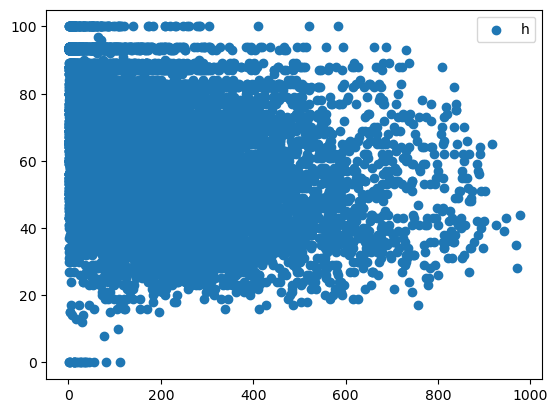

windspeed


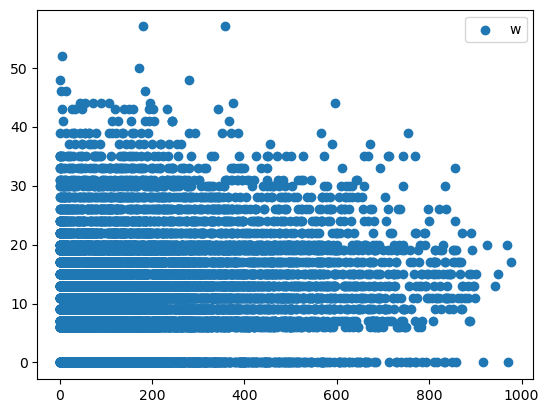

casual


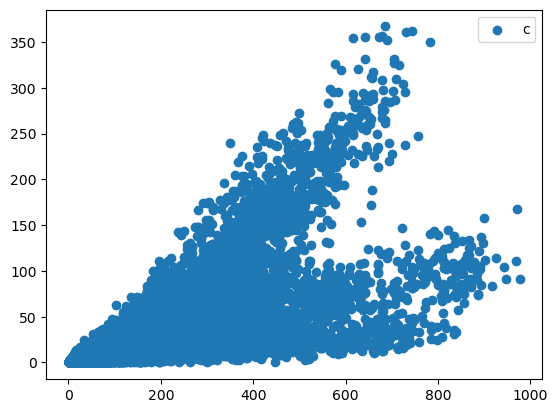

registered


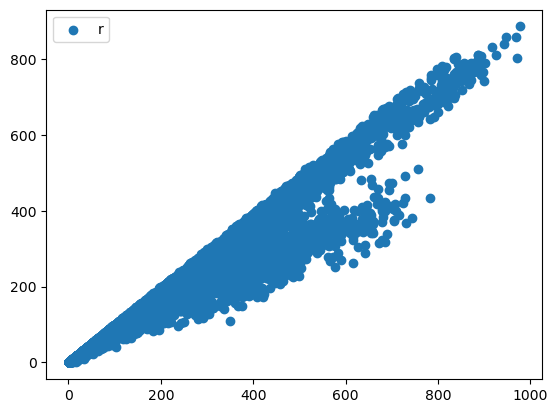

In [48]:
for i in df.drop("count", axis=1).columns:
    print(i)
    plt.scatter(x= df["count"], y=df[i])
    plt.legend(i)
    plt.show()

In [49]:
df_casual = df.drop("registered", axis=1)
df_casual

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count
0,0,1,0,0,1,9.84,14.395,81,0.0000,3,16
1,1,1,0,0,1,9.02,13.635,80,0.0000,8,40
2,2,1,0,0,1,9.02,13.635,80,0.0000,5,32
3,3,1,0,0,1,9.84,14.395,75,0.0000,3,13
4,4,1,0,0,1,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,5467,4,0,1,1,15.58,19.695,50,26.0027,7,336
10882,5468,4,0,1,1,14.76,17.425,57,15.0013,10,241
10883,5469,4,0,1,1,13.94,15.910,61,15.0013,4,168
10884,5470,4,0,1,1,13.94,17.425,61,6.0032,12,129


datetime


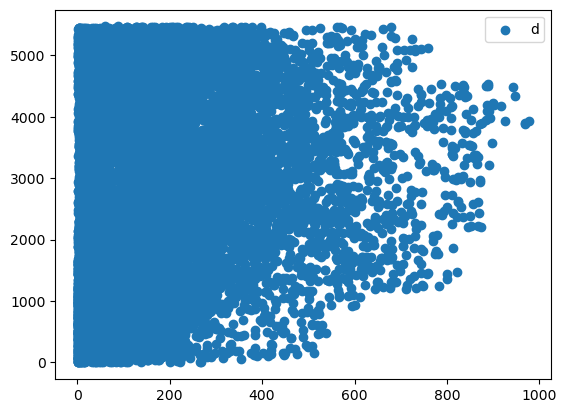

season


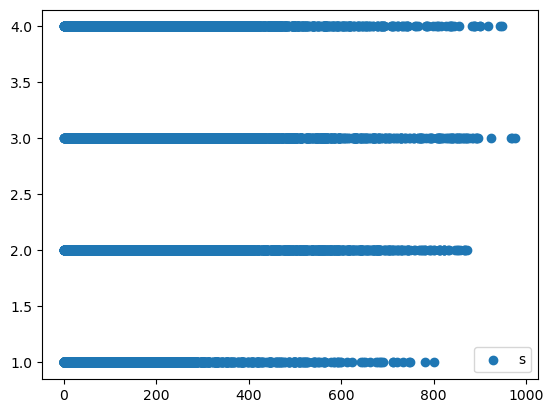

holiday


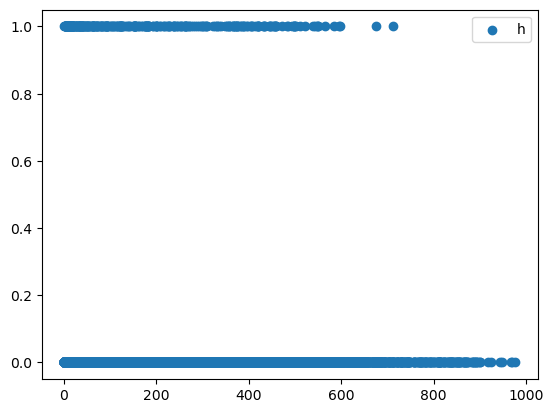

workingday


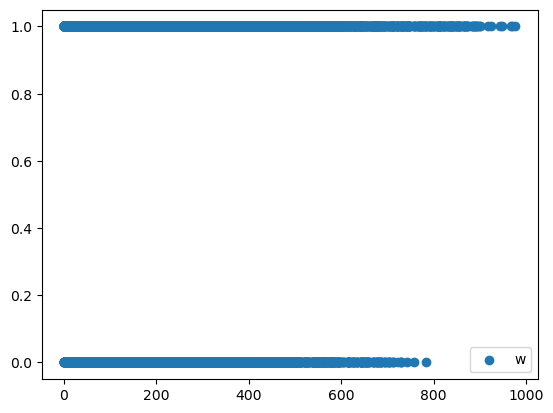

weather


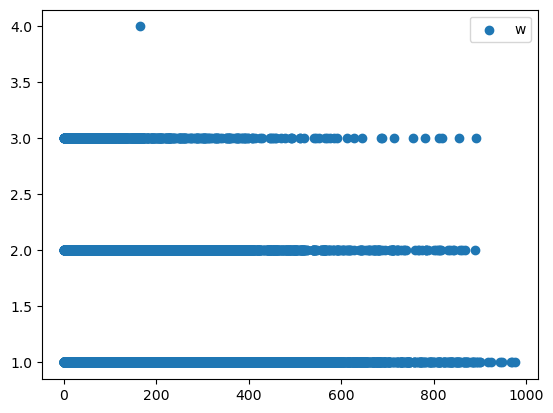

temp


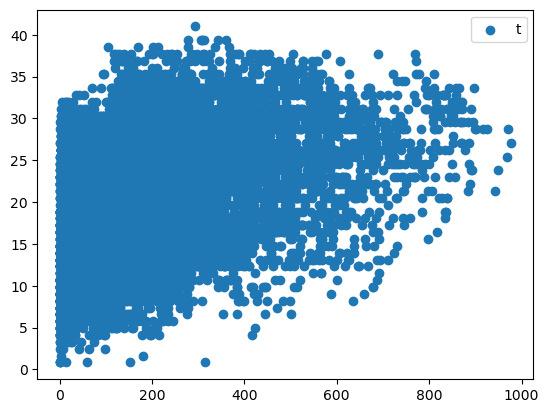

atemp


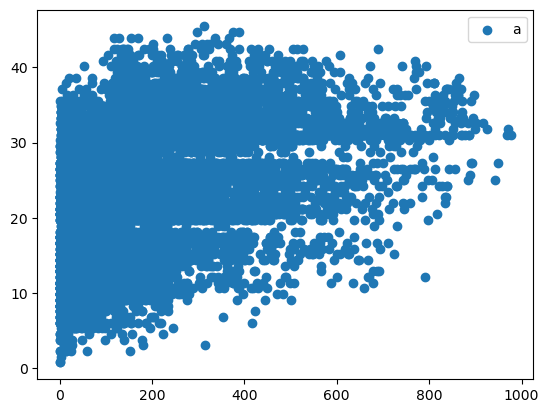

humidity


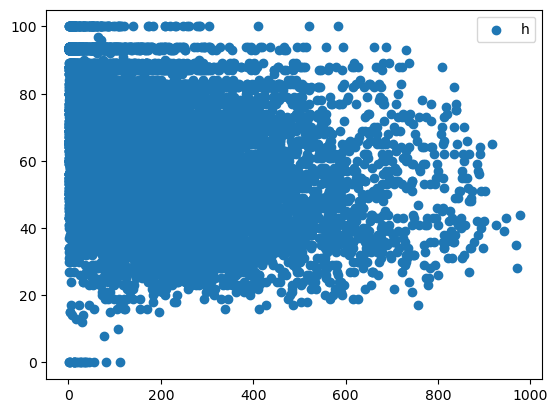

windspeed


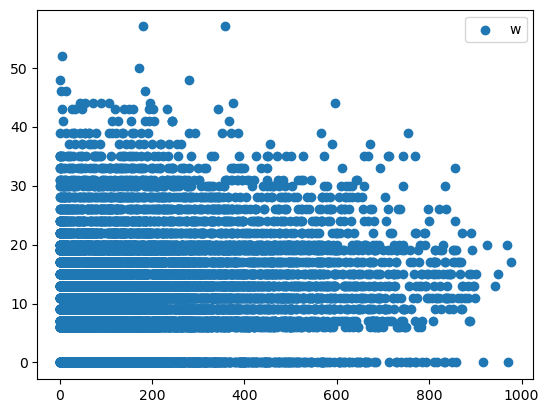

casual


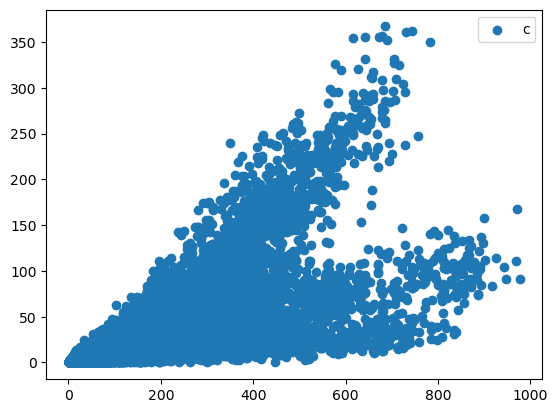

In [50]:

for i in df_casual.drop("count", axis=1).columns:
    print(i)
    plt.scatter(x= df_casual["count"], y=df[i])
    plt.legend(i)
    plt.show()

In [51]:
df_registered = df.drop("casual", axis=1)
df_registered

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,count
0,0,1,0,0,1,9.84,14.395,81,0.0000,13,16
1,1,1,0,0,1,9.02,13.635,80,0.0000,32,40
2,2,1,0,0,1,9.02,13.635,80,0.0000,27,32
3,3,1,0,0,1,9.84,14.395,75,0.0000,10,13
4,4,1,0,0,1,9.84,14.395,75,0.0000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,5467,4,0,1,1,15.58,19.695,50,26.0027,329,336
10882,5468,4,0,1,1,14.76,17.425,57,15.0013,231,241
10883,5469,4,0,1,1,13.94,15.910,61,15.0013,164,168
10884,5470,4,0,1,1,13.94,17.425,61,6.0032,117,129


datetime


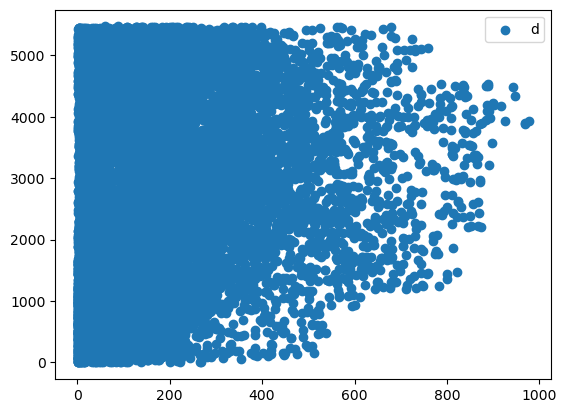

season


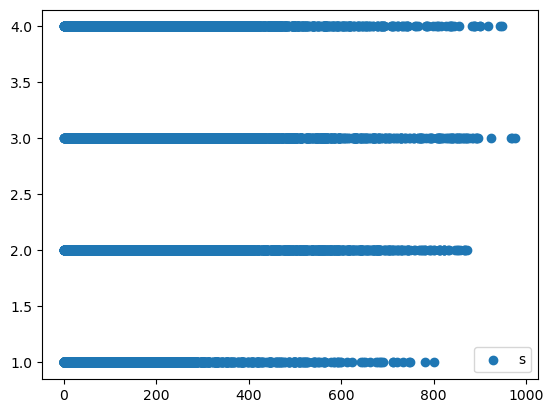

holiday


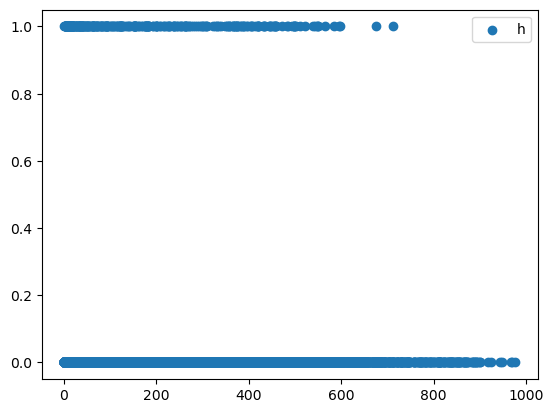

workingday


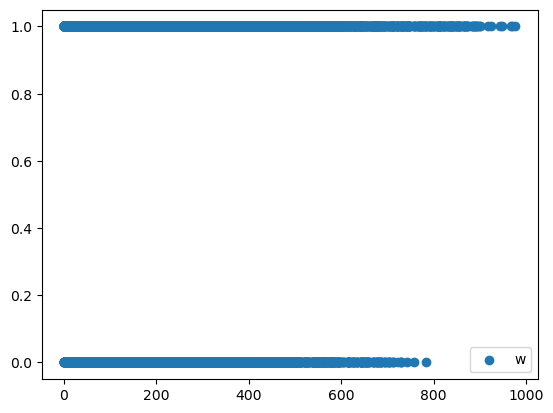

weather


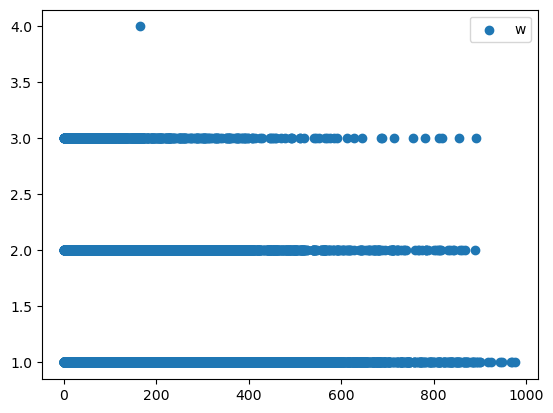

temp


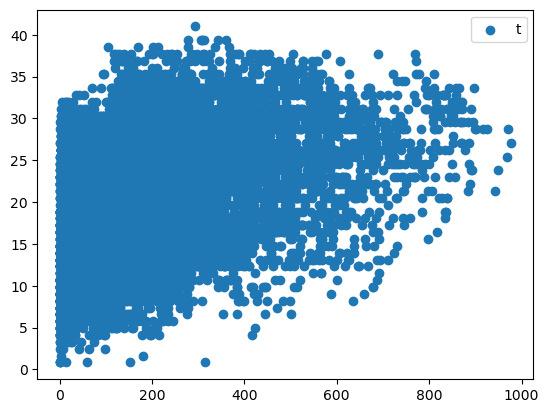

atemp


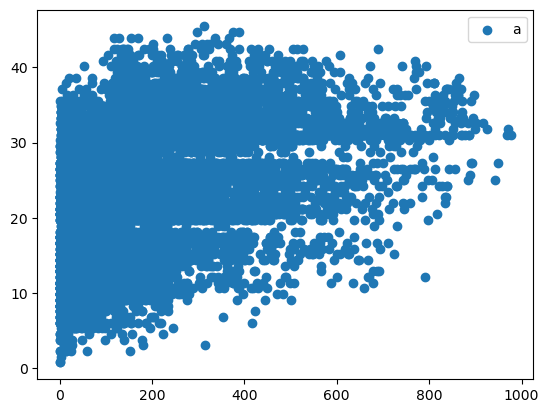

humidity


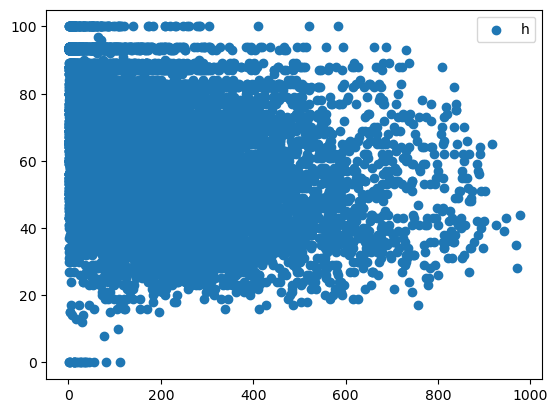

windspeed


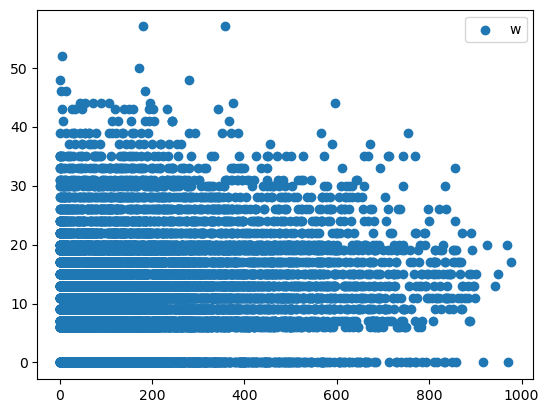

registered


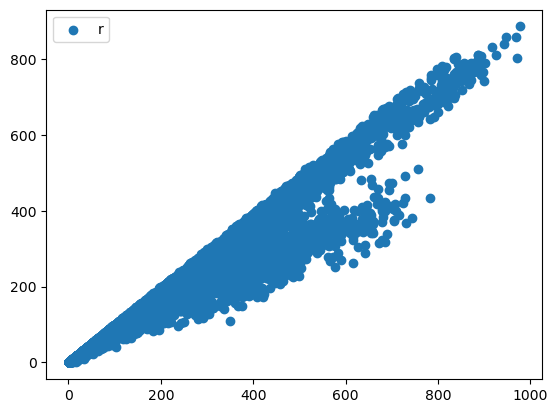

In [52]:

for i in df_registered.drop("count", axis=1).columns:
    print(i)
    plt.scatter(x= df_registered["count"], y=df[i])
    plt.legend(i)
    plt.show()

In [53]:
# 전체의 데이터에 관한

X = df.drop("count", axis=1).values
y = df["count"].values

--------------
# LinearRegression

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [63]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse, mse

(np.float64(1.9608544357697234e-11), np.float64(3.8449501182778007e-22))

In [64]:
lr_r2 = r2_score(y_test, y_pred)
lr_r2

np.float64(1.0)